In [1]:
import numpy as np
import pandas as pd
from pyBallMapper import BallMapper
from gen_mapper_graph import read_file_from_zip
import networkx as nx
from matplotlib.colors import ListedColormap
from matplotlib import cm
import matplotlib.pyplot as plt

my_rainbow_palette = cm.get_cmap(name='viridis')

In [16]:
data = read_file_from_zip('../data/Supersense-Role/SS_fine_tuned.zip', 'fine_tuning_changes/150.txt')

In [17]:
data.apply(np.linalg.norm, axis=1).mean()

20.94128419274894

In [18]:
g = BallMapper(data.values, pd.DataFrame(data.apply(np.linalg.norm, axis=1)), 13)

In [19]:
len(g.Graph.nodes)

662

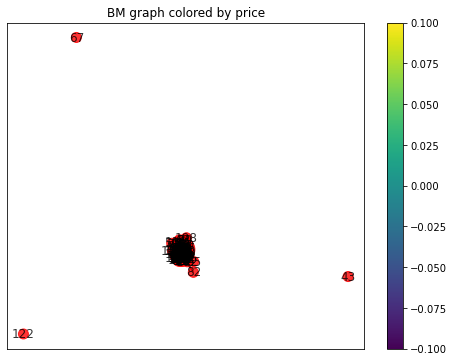

In [6]:
plt.figure(figsize= (8,6))

nx.draw_networkx(g.Graph, 
                 pos=nx.spring_layout(g.Graph),
                 node_color = [g.Graph.nodes[node]['color'] for node in g.Graph.nodes],
                 node_size =  [g.Graph.nodes[node]['size rescaled'] for node in g.Graph.nodes],
                 alpha=0.8)

# plot a legend
sm = plt.cm.ScalarMappable(cmap = my_rainbow_palette,
                           norm = plt.Normalize(vmin=g.min_color_value, 
                                                vmax=g.max_color_value))
plt.colorbar(sm)
plt.title('BM graph colored by price')
plt.show()